## Task 2

1. Develop yourself using *numpy* library: 
    - a function to implement *stochastic gradient descent (SGD)* algorithm; 
    - *Adam's* optimization algorithm  
    for a function of two variables $f(x,y)$.
2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum
    using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value 
    of the difference between two successive approximations 
    of the solution $(x_{next} – x_{prev})$ on the iteration number $N$.

In [13]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [14]:
def f(w):
    return np.sum(w * w) 

def grad(w):
    return 2 * w

In [15]:
def stochastic_gradient_descent(max_epochs, eps, p_start, func, grad_func, alpha=0.05):
    w = p_start
    w_history = w
    f_history = func(w)
    i = 0
    diff = eps + 1  # stub
    rand = np.random.RandomState()
    
    while i < max_epochs and diff > eps:
        p = rand.randint(w.shape[0])
        
        delta_w = -alpha * grad_func(w)
        w[p] = w[p] + delta_w[p]
        
        w_history = np.vstack((w_history, w))
        f_history = np.vstack((f_history, func(w)))

        i += 1
        diff = np.absolute(f_history[-1] - f_history[-2])
    
    return w_history, f_history

In [16]:
def adam_gradient_descent(max_epochs, eps, p_start, func, grad_func, alpha=0.05, beta_1=0.8, beta_2=0.999):
    w = p_start
    w_history = w
    f_history = func(w)
    i = 0
    diff = eps + 1  # stub
    
    m = np.zeros(w.shape)
    v = np.zeros(w.shape)
    
    while i < max_epochs and diff > eps:
        grad_w = grad_func(w)
        
        m = beta_1 * m + (1. - beta_1) * grad_w
        v = beta_2 * v + (1. - beta_2) * pow(grad_w, 2)
        
        m_hat = m / (1. - pow(beta_1, i + 1)) 
        v_hat = v / (1. - pow(beta_2, i + 1)) 
        
        delta_w = -alpha * m_hat / (np.sqrt(v_hat) + eps)
        w = w + delta_w
        
        w_history = np.vstack((w_history, w))
        f_history = np.vstack((f_history, func(w)))

        i += 1
        diff = np.absolute(f_history[-1] - f_history[-2])
    
    return w_history, f_history

In [17]:
def get_plot_data():
    x_coord = np.linspace(-10.0, 10.0, 50)
    y_coord = np.linspace(-10.0, 10.0, 50)
    
    w1, w2 = np.meshgrid(x_coord, y_coord)
    pts = np.vstack((w1.flatten(), w2.flatten()))
    pts = pts.transpose()
    f_vals = np.asarray([f(x) for x in pts])
    
    return pts, f_vals

def annotate_pt(text, xy, xy_text, color):
    plt.plot(xy[0], xy[1], marker='P', markersize=10, c=color)
    plt.annotate(text, xy=xy, xytext=xy_text, arrowprops=dict(arrowstyle="->", color = color, connectionstyle='arc3'))

def function_plot(pts, f_val):
    f_plot = plt.scatter(pts[:,0], pts[:,1], c=f_val, vmin=min(f_val), vmax=max(f_val), cmap='RdBu_r')
    plt.colorbar(f_plot) 
    
def visualize_learning(w_history):
    function_plot(*get_plot_data())
    
    plt.plot(w_history[:,0], w_history[:,1], marker='o', c='magenta')
    
    iter = w_history.shape[0]
    for w,i in zip(w_history, range(iter-1)):
        plt.annotate("", xy=w, xycoords='data', xytext=w_history[i + 1,:], textcoords='data')  

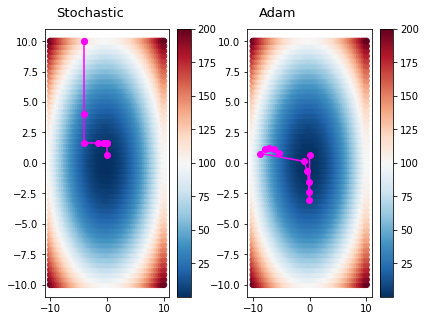

In [18]:
# rand = np.random.RandomState(23)
# w_i = rand.uniform(-10, 10, 2)
w_i = np.asarray([-10., 10.])

fig, ax = plt.subplots(1, 2)

plt.subplot(1, 2, 1)
w_h, f_h = stochastic_gradient_descent(10, -1, w_i, f, grad, 0.3)
visualize_learning(w_h)
plt.text(-9, 12, "Stochastic", fontsize=13)

plt.subplot(1, 2, 2)
w_h, f_h = adam_gradient_descent(10, -1, w_i, f, grad, 0.8)
visualize_learning(w_h)
plt.text(-9, 12, "Adam", fontsize=13)

fig.subplots_adjust(left=0.07, bottom=0.04, top=0.97, hspace=0.13, wspace=0.3)